In [63]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as  plt

filename="/content/drive/MyDrive/spam.csv"
with open(filename, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}


In [64]:
#encodings = ["utf-8","utf-8-sig", "iso-8859-1", "latin1", "cp1252","Windows-1252"]
#for en in encodings:
 #   try:
  #      df = pd.read_csv('file.csv',encoding=en)
   #     break
    #except Exception as e:  # or the error you receive
     #   print(en)
df=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding="Windows-1252")
df.shape
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5078,ham,Mark works tomorrow. He gets out at 5. His wor...,NaN,NaN,NaN
5183,ham,"Fuuuuck I need to stop sleepin, sup",NaN,NaN,NaN
875,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",NaN,NaN,NaN


##1.DATA cleaning
##2.EDA
##3.TEXT preprocessing
##4.Model building
##5.Evaluation
##6.Improvement
##7.Website
##8.Deploy




In [65]:
#(1)data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [66]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
538,ham,Ummmmmaah Many many happy returns of d day my ...,NaN,NaN,NaN
4988,ham,So your telling me I coulda been your real Val...,NaN,NaN,NaN
2782,ham,Well at this right I'm gonna have to get up an...,NaN,NaN,NaN
3011,ham,Yeah no probs - last night is obviously catchi...,NaN,NaN,NaN


In [67]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
4863,ham,Sorry da..today i wont come to play..i have dr...,NaN,NaN,NaN
495,ham,Got meh... When?,NaN,NaN,NaN
652,ham,"Wait, do you know if wesleys in town? I bet sh...",NaN,NaN,NaN
4099,ham,I not at home now lei...,NaN,NaN,NaN
4062,ham,How are you. Its been ages. How's abj,NaN,NaN,NaN


In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])


df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [69]:
# missing values
df.isnull().sum()


target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [70]:
# check for duplicate values
df.duplicated().sum()

403

In [71]:
df.duplicated().sum()

403

In [72]:
df = df.drop_duplicates(keep='first')

In [73]:
df.shape

(5169, 5)

#2.EDA

In [74]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

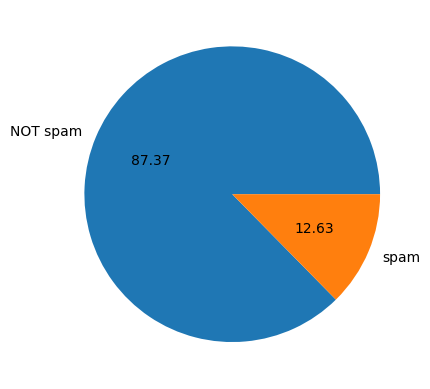

In [76]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['NOT spam','spam'],autopct="%0.2f")
plt.show()

In [77]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
print(nltk.__version__)

3.8.1


In [79]:
df['num_char']=df['text'].apply(len)

In [80]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [81]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [82]:
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char
2622,0,Ok lor...,NaN,NaN,NaN,9
2285,0,"Hi, wkend ok but journey terrible. Wk not good...",NaN,NaN,NaN,85
4557,0,PISS IS TALKING IS SOMEONE THAT REALISE U THAT...,NaN,NaN,NaN,90
5117,0,Aslamalaikkum....insha allah tohar beeen muht ...,NaN,NaN,NaN,88
907,0,I.ll give her once i have it. Plus she said gr...,NaN,NaN,NaN,79


In [83]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [84]:
df[['num_char','num_word','num_sentences']].describe()


,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [85]:
# not spam
df[df['target'] == 0][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [86]:
# spam
df[df['target'] == 1][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

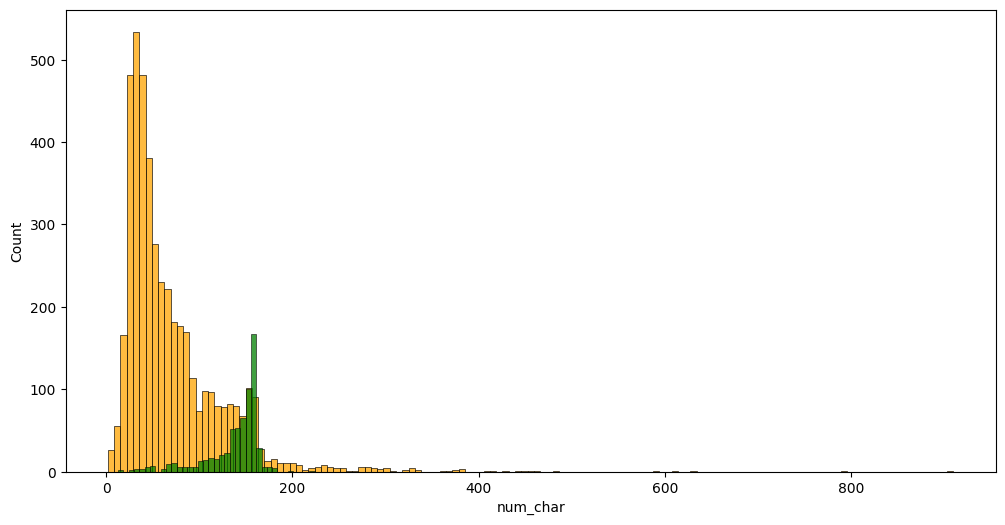

In [87]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'],color='orange')
sns.histplot(df[df['target'] == 1]['num_char'],color='green')

<Axes: xlabel='num_word', ylabel='Count'>

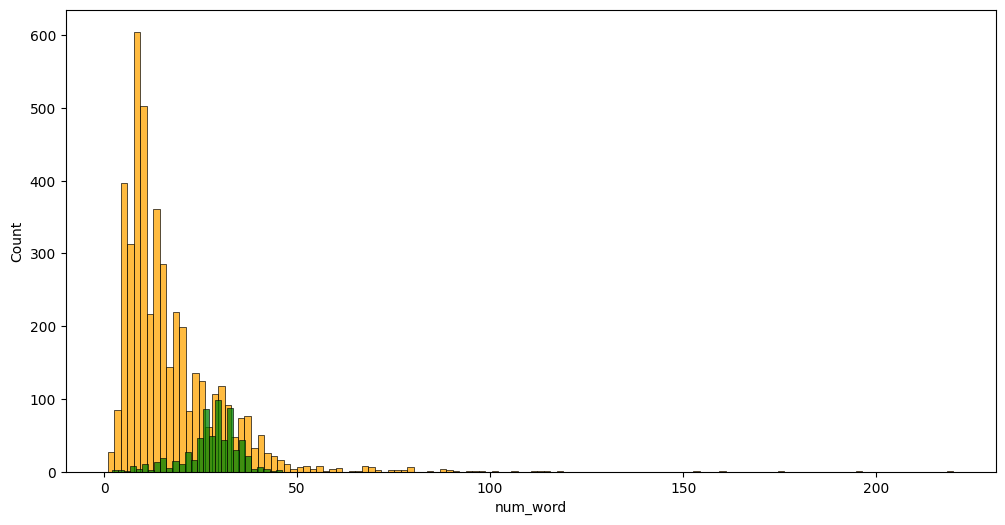

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'],color='orange')
sns.histplot(df[df['target'] == 1]['num_word'],color='green')

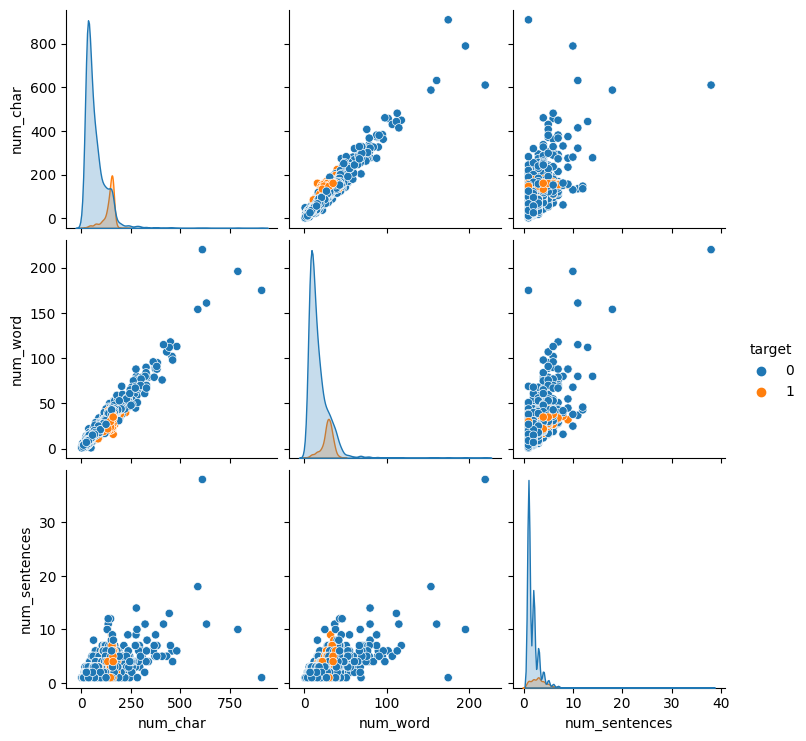

In [89]:
sns.pairplot(df,hue='target')

<ipython-input-90-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

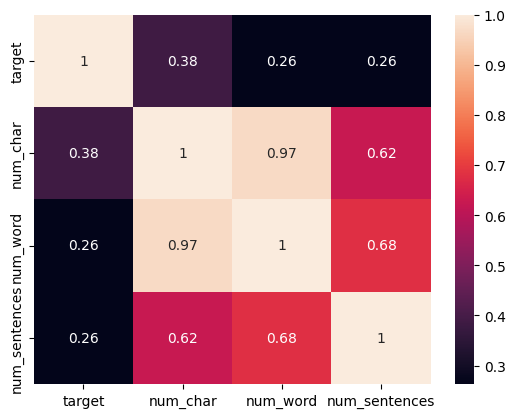

In [90]:
sns.heatmap(df.corr(),annot=True)

3.Data Preprocessing

 i)Lowercase

 ii)tokenization

 iii)removing stop word and punctuation

 iv)removing special charcaters

 v)Stemming




In [91]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
print(ps.stem('dirty'))
print(ps.stem('courageous'))

dirti
courag


In [92]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
      if i.isalnum():
        y.append(i)

    text=y[:]
    y.clear()


    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    text=y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
transform_text("text hello ?????? my name is Aditya NEgi.")

'text hello name aditya negi'

In [94]:
df['transformed_text'] = df['text'].apply(transform_text)

In [95]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


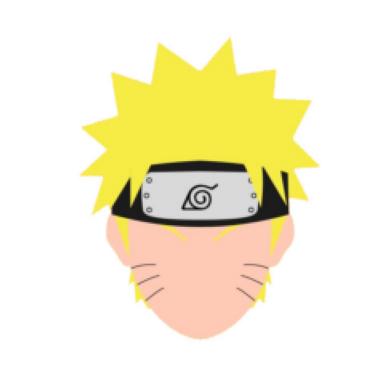

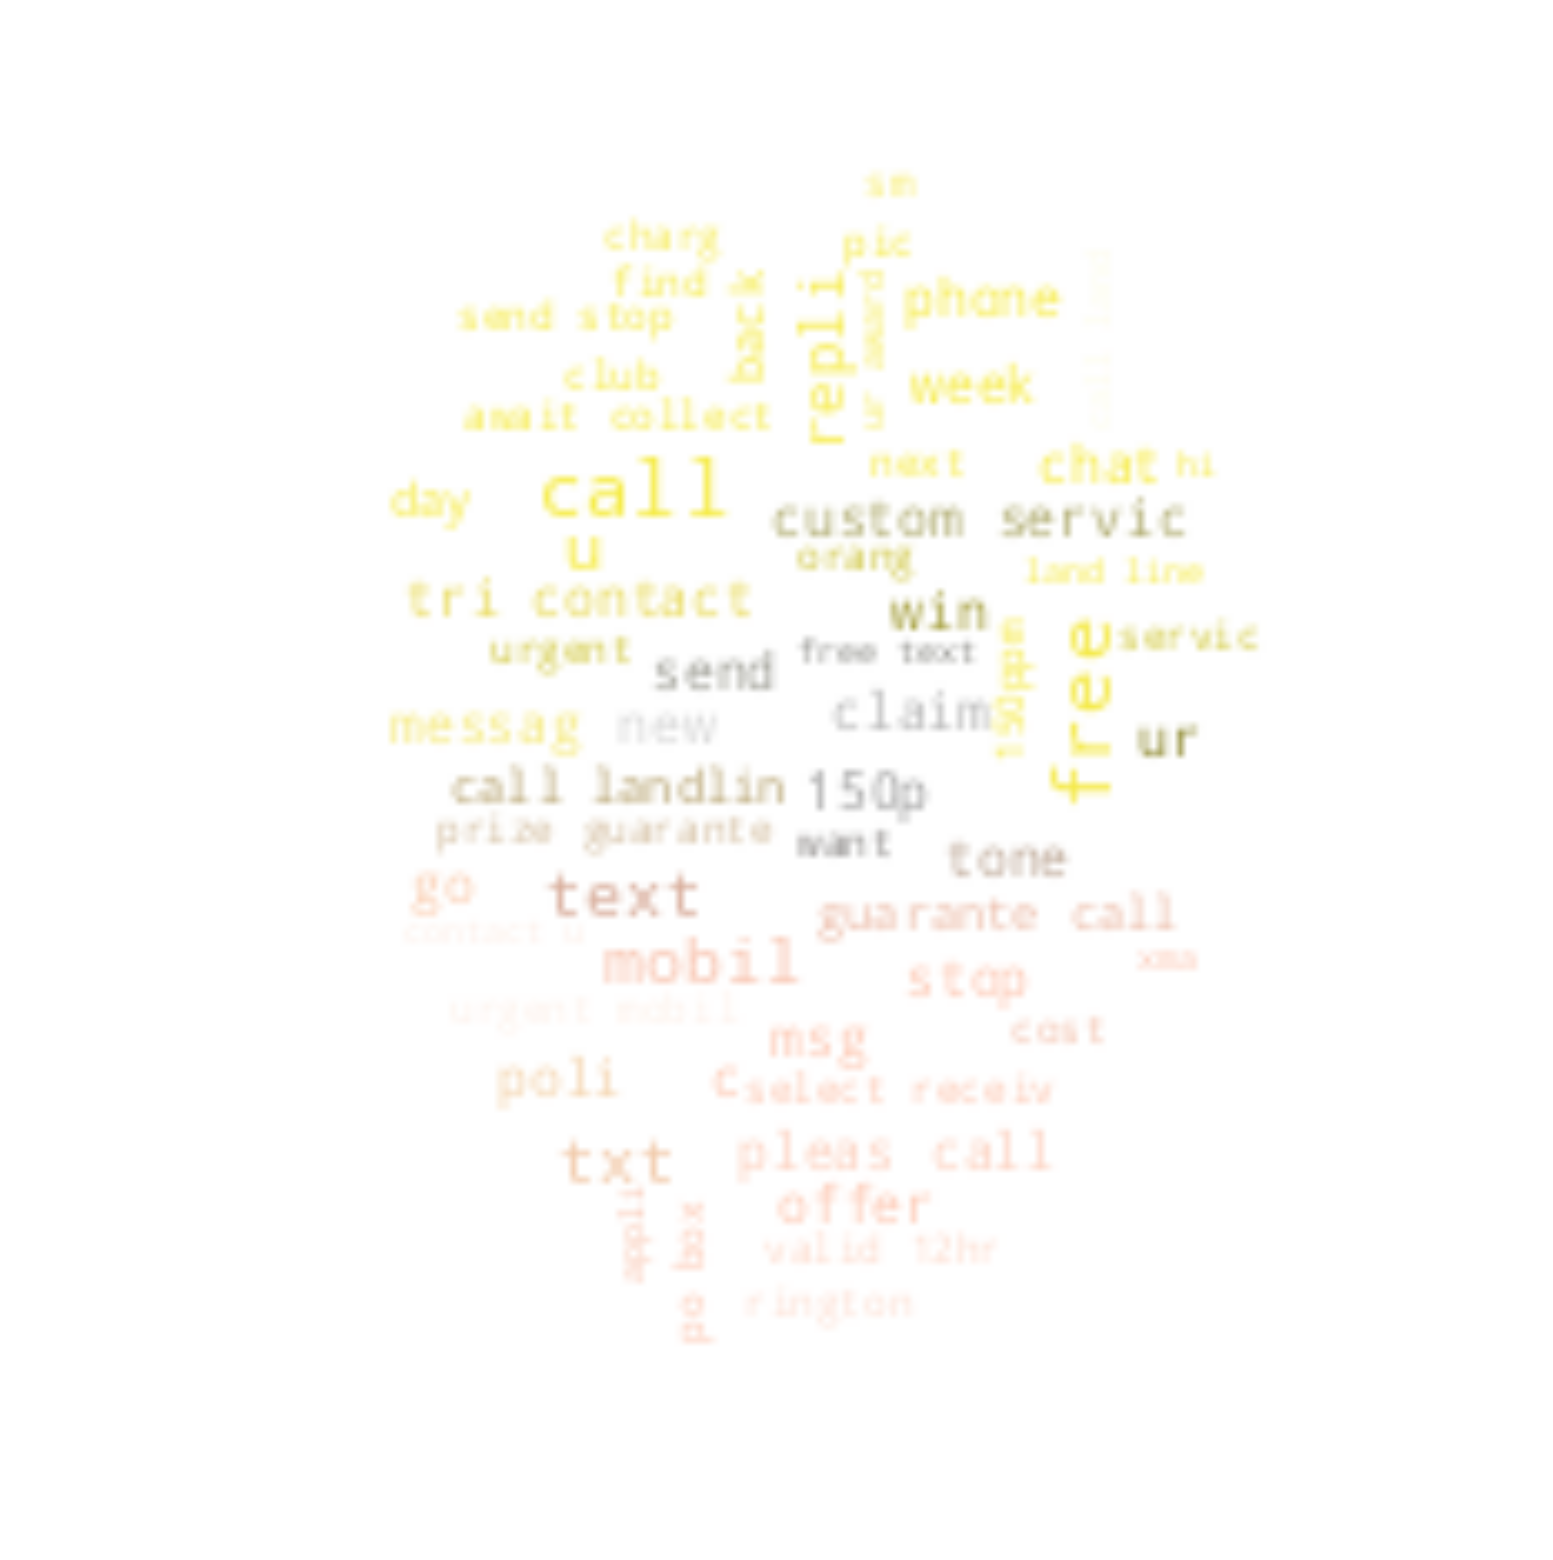

In [96]:
from wordcloud.color_from_image import ImageColorGenerator
from PIL import Image
from wordcloud import WordCloud
from PIL import Image
import requests
url='/content/drive/MyDrive/__results___6_1.png'
#im=requests.get(url,stream=True).raw
image=Image.open(url)
plt.axis('off')
plt.imshow(image)

mask1=np.array(image)
'''imgo=np.array(Image.open(r"/content/drive/MyDrive/__results___6_1.png"))
imlen = np.round(imgo).astype(int)
kkk=[]
for i in imlen:
  im=int(imlen[i])
  kkk+=im'''
wc = WordCloud(background_color='white',
               mask=mask1,
               max_font_size=12,
               max_words=1000
               )
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) #/content/drive/MyDrive/jojo.png
img_color=ImageColorGenerator(mask1)
plt.figure(figsize=[20,20])

plt.imshow(spam_wc.recolor(color_func=img_color),interpolation='bilinear')
plt.axis('off')
plt.show()

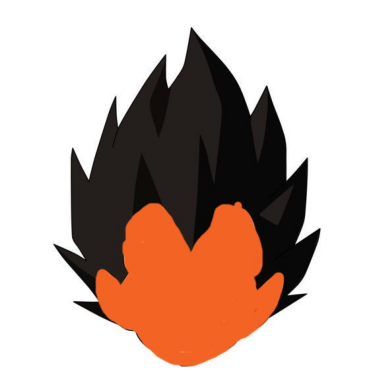

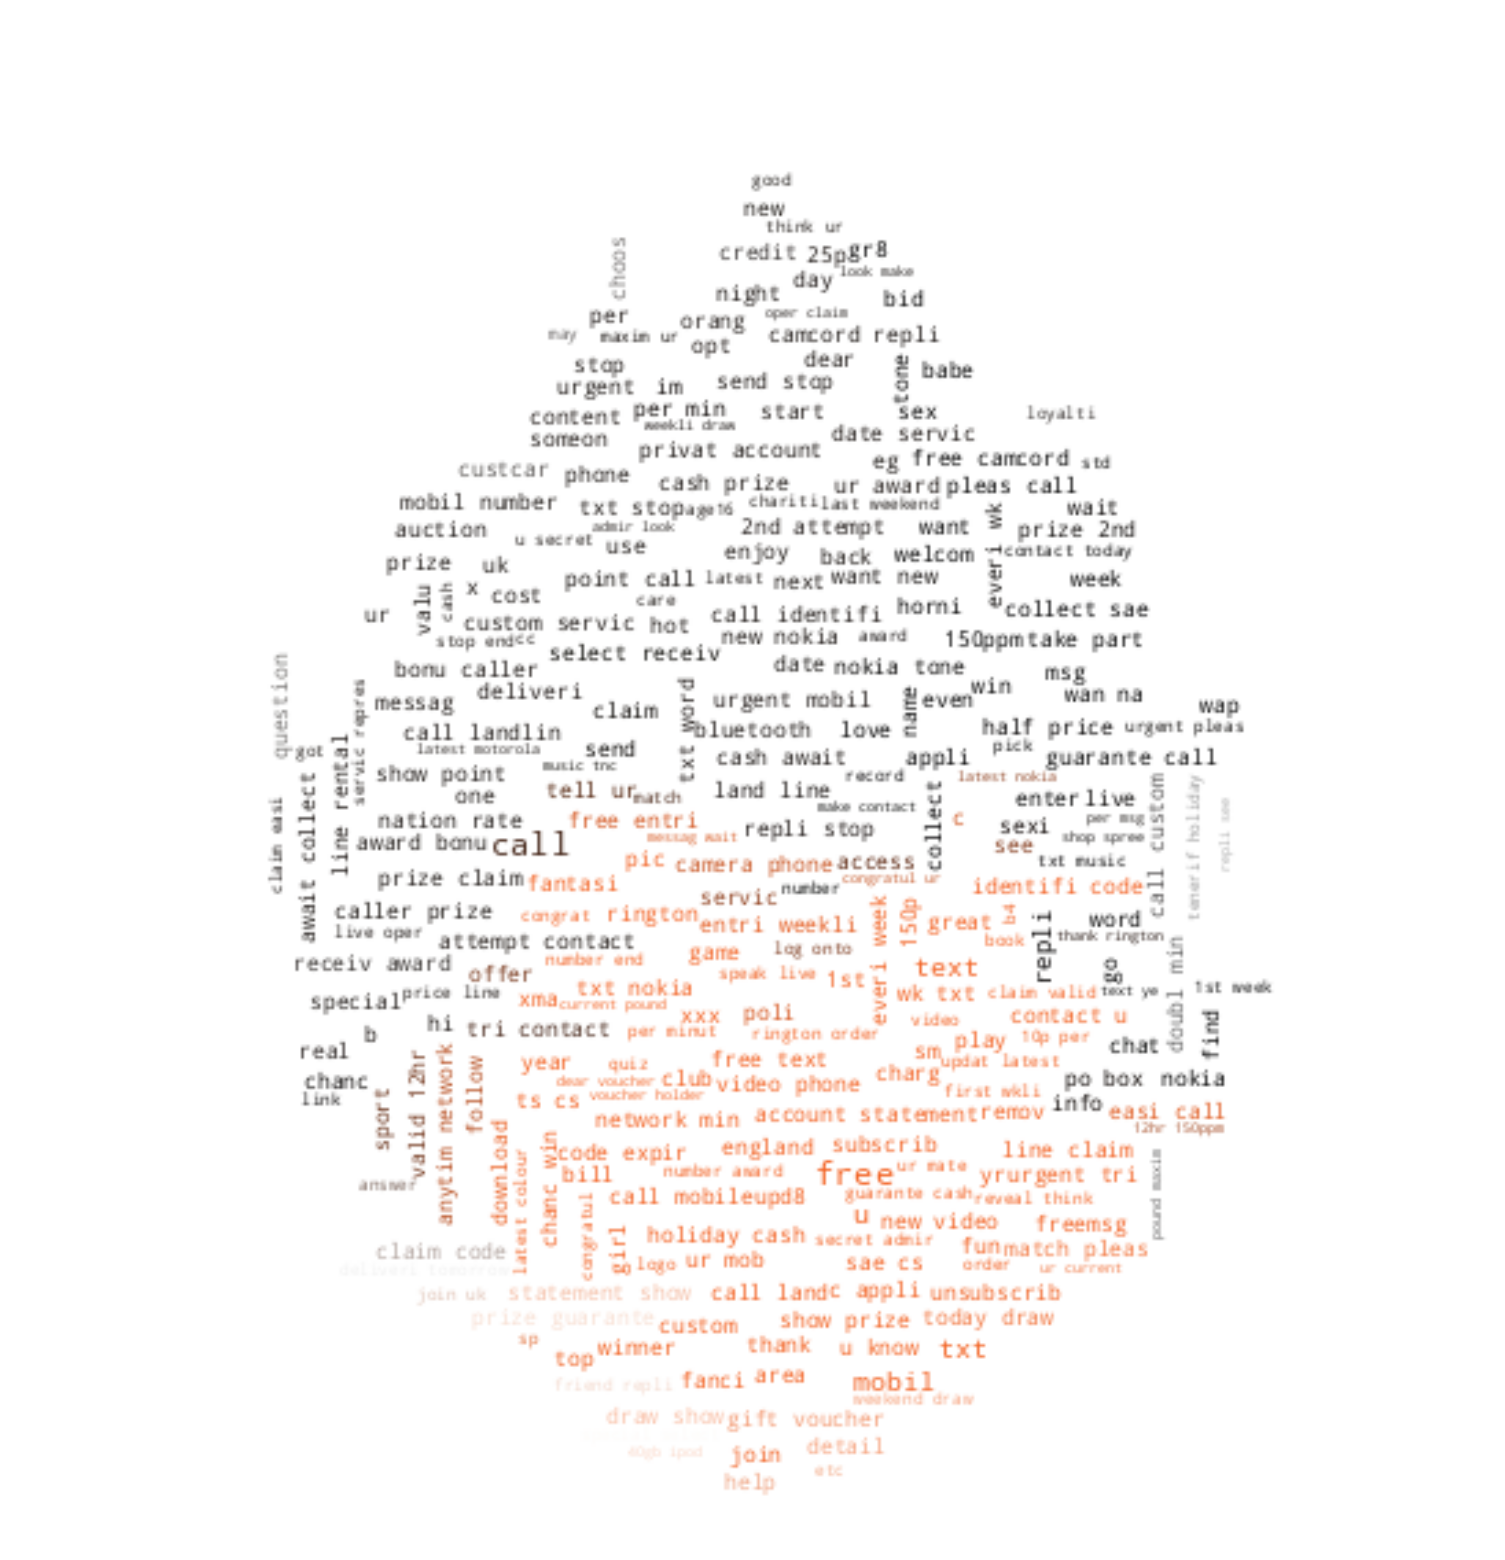

In [97]:
from wordcloud.color_from_image import ImageColorGenerator
from PIL import Image
from wordcloud import WordCloud
from PIL import Image
import requests
url='/content/drive/MyDrive/vegeta.jpeg'
#im=requests.get(url,stream=True).raw
image=Image.open(url)
plt.axis('off')
plt.imshow(image)

mask1=np.array(image)

wc = WordCloud(background_color='white',
               mask=mask1,
               max_font_size=12,
               max_words=1000
               )
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) #/content/drive/MyDrive/jojo.png
img_color=ImageColorGenerator(mask1)
plt.figure(figsize=[20,20])

plt.imshow(spam_wc.recolor(color_func=img_color),interpolation='bilinear')
plt.axis('off')
plt.show()

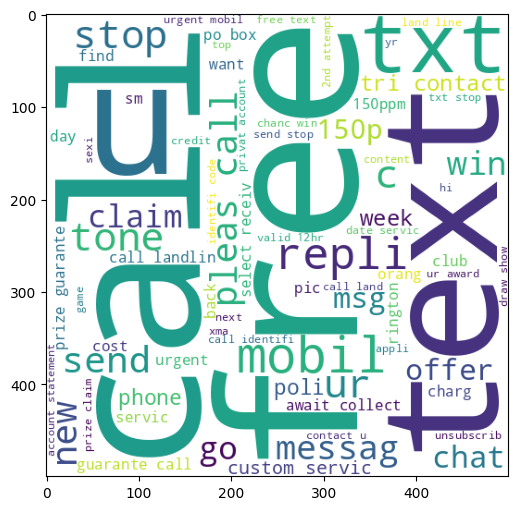

In [98]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

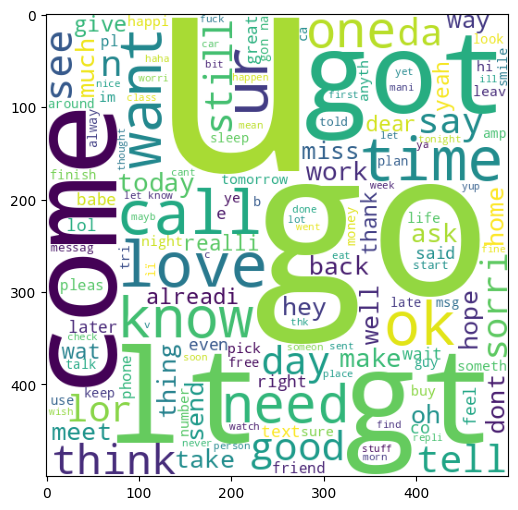

In [99]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [100]:
not_spam=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    not_spam.append(word)
len(not_spam)

9939

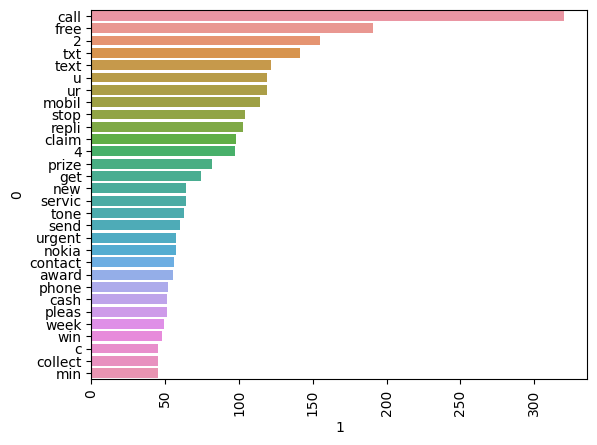

In [101]:
from collections import Counter
data=pd.DataFrame(Counter(not_spam).most_common(30))
sns.barplot(x=data[1],
            y=data[0])
plt.xticks(rotation='vertical')
plt.show()

In [102]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


#4.Model Building

In [103]:
import sklearn.feature_extraction.text
dir(sklearn.feature_extraction)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

x=tfidf.fit_transform(df['transformed_text']).toarray()

In [104]:
x.shape

(5169, 3000)

In [105]:
y=df['target'].values

In [106]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [107]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gn=GaussianNB()
mn=MultinomialNB()
bn=BernoulliNB()

In [108]:
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion:",confusion_matrix(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))

accuracy: 0.8694390715667312
confusion: [[788 108]
 [ 27 111]]
precision: 0.5068493150684932


In [109]:
mn.fit(x_train,y_train)
y_pred=mn.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion:",confusion_matrix(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))

accuracy: 0.9709864603481625
confusion: [[896   0]
 [ 30 108]]
precision: 1.0


In [110]:
bn.fit(x_train,y_train)
y_pred=bn.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion:",confusion_matrix(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))

accuracy: 0.9835589941972921
confusion: [[895   1]
 [ 16 122]]
precision: 0.991869918699187


#tfidf-->MNB

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
sv=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [113]:
clfs={
     'SVC':sv,
       'NB':mnb,
       'DT': dtc,
        'LR': lrc,
         'RF': rfc,
          'AdaBoost': abc,
           #'BgC': bc,
             'KNC':knc,
             'ETC': etc,
              'GBDT':gbdt,
               'xgb':xgb

    }

In [114]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    return acc, prec

In [115]:
%%time

acc_score=[]
pre_score=[]
for name,clf in clfs.items():
    cur_acc,cur_pre=train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For -->",name)
    print("Accuracy -->",cur_acc)
    print("Precision -->",cur_pre)

    acc_score.append(cur_acc)
    pre_score.append(cur_pre)

For --> SVC
Accuracy --> 0.9758220502901354
Precision --> 0.9747899159663865
For --> NB
Accuracy --> 0.9709864603481625
Precision --> 1.0
For --> DT
Accuracy --> 0.9303675048355899
Precision --> 0.8367346938775511
For --> LR
Accuracy --> 0.9584139264990329
Precision --> 0.9702970297029703
For --> RF
Accuracy --> 0.9758220502901354
Precision --> 0.9829059829059829
For --> AdaBoost
Accuracy --> 0.960348162475822
Precision --> 0.9292035398230089
For --> KNC
Accuracy --> 0.9052224371373307
Precision --> 1.0
For --> ETC
Accuracy --> 0.9748549323017408
Precision --> 0.9745762711864406
For --> GBDT
Accuracy --> 0.9468085106382979
Precision --> 0.9191919191919192
For --> xgb
Accuracy --> 0.9671179883945842
Precision --> 0.9333333333333333
CPU times: user 1min 52s, sys: 1.8 s, total: 1min 54s
Wall time: 1min 36s


In [116]:
result_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_score,'Precision':pre_score})
result_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,NB,0.970986,1.000000
2,DT,0.930368,0.836735
3,LR,0.958414,0.970297
4,RF,0.975822,0.982906
5,AdaBoost,0.960348,0.929204
6,KNC,0.905222,1.000000
7,ETC,0.974855,0.974576
8,GBDT,0.946809,0.919192
9,xgb,0.967118,0.933333


In [117]:
result_df1=pd.melt(result_df,id_vars='Algorithm')
result_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,NB,Accuracy,0.970986
2,DT,Accuracy,0.930368
3,LR,Accuracy,0.958414
4,RF,Accuracy,0.975822
5,AdaBoost,Accuracy,0.960348
6,KNC,Accuracy,0.905222
7,ETC,Accuracy,0.974855
8,GBDT,Accuracy,0.946809
9,xgb,Accuracy,0.967118


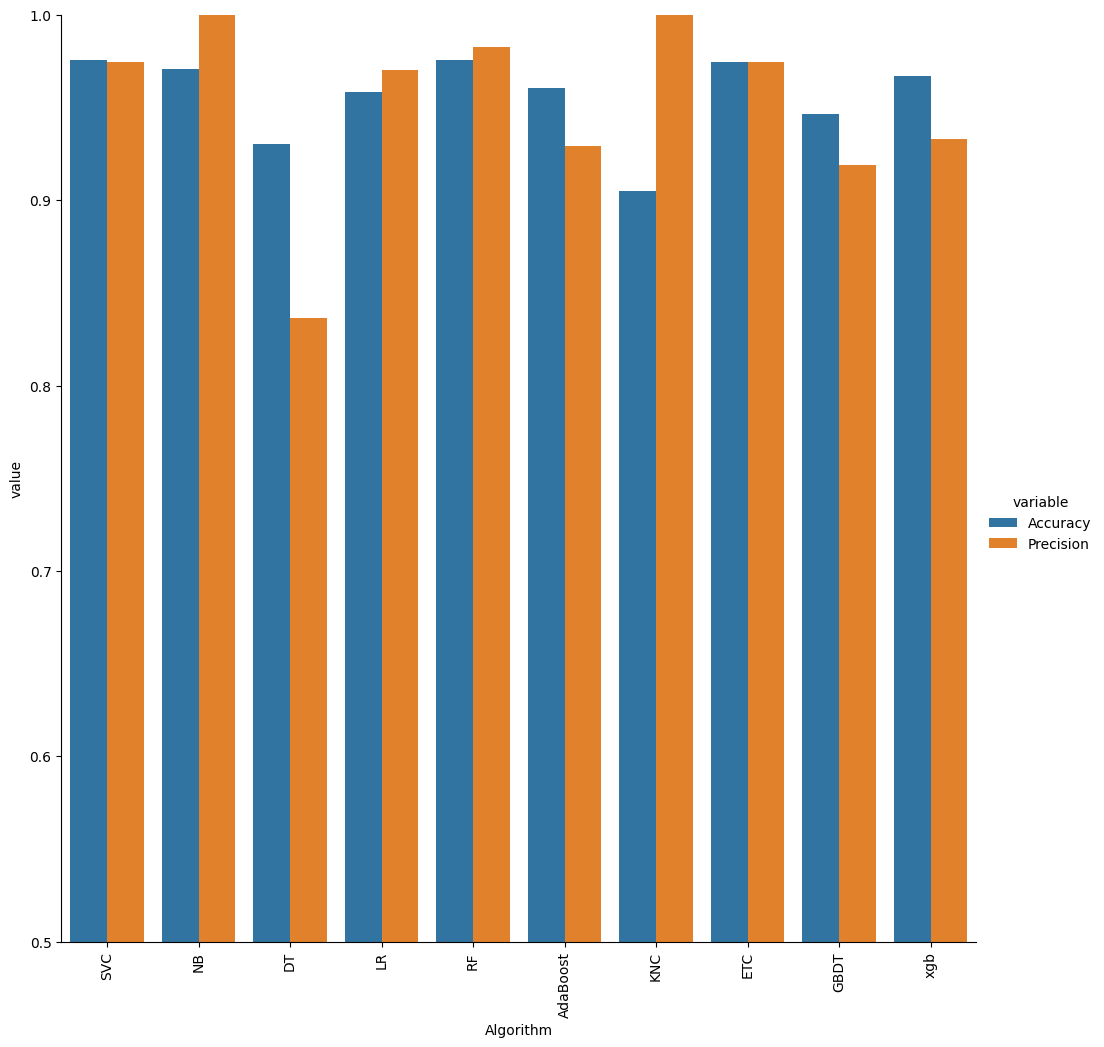

In [118]:
sns.catplot(x='Algorithm',
            y='value',
            hue='variable',
            data=result_df1,
            kind='bar',
            height=10)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#Model improvement


#Change max_features parameter of Tfidf

In [119]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':acc_score,'Precision_scaling':pre_score}).sort_values('Precision_scaling',ascending=False)

In [120]:
new_df=result_df.merge(temp_df,on='Algorithm')

In [121]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [122]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,DT,0.930368,0.836735,0.930368,0.836735,0.930368,0.836735,0.930368,0.836735
3,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
4,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,KNC,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
7,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333


In [123]:
#voting Classifier
sv=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mn=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [124]:
voting = VotingClassifier(estimators=[('sv', sv),
                                      ('mn', mn),
                                      ('et', etc),
                                      ('rfc',rfc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('sv',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mn', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [125]:
y_pred=voting.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9806576402321083
Precision: 0.9916666666666667


###Applying stacking

In [126]:
estimators=[('svm',sv),('mnb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [127]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [128]:
%%time
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832
CPU times: user 4min 24s, sys: 1.1 s, total: 4min 25s
Wall time: 4min 27s


In [129]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))